In [4]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import scipy
from numpy import loadtxt
from scipy.optimize import curve_fit
import cv2

# Studio della curva di saturazione

# Funzioni

In [5]:
def lin (x,q,m):
    return q*x+m


# Creo la roi 
uso un' immagine del set "sat" e delimito la zona dove è visibile la fibra 

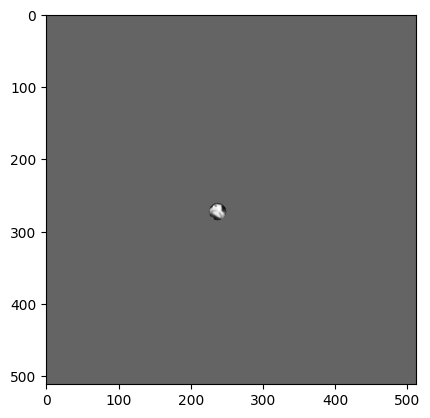

In [7]:
 I=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_23Gy_1p_4us_1.TIF")

total_row , total_col ,layers = I.shape

x,y = np.ogrid [: total_row , :total_col]

cen_x, cen_y= 273, 237 #vanno definiti in funzione della posizione della fibra scintillante
d= np.sqrt ((x-cen_x)**2 + (y-cen_y)**2)
r= 12 #va impostato

roi= d>r

I[roi]=100
#imarray=np.array(I)
#imdat=imarray[np.nonzero(I)]


plt.imshow(I);
plt.show();

# Buio

In [22]:
Dark=[]
for i in range (1,10):
    imD=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/buio_{num:d}.TIF".format(num=i))
    
    B=imD
    Dark.append(B)

NB l'indice del dark è uguale al numero di buio nei file meno 1

# Segnali

Le dosi usate sono 0.7, 3, 6 ,9, 12, 15,18, 20, 23 Gy 

N.B. in queste misure ho fatto la deviazione standard dalla media dei 3file usati e NON la deviazione standard dalla media del segnale. Infatti si osservacome in questo caso siano molto più basse mentre la dev.st rispetto al segnale medio è molto alta (vedi file sat_imagej).

In [36]:
G70c=[]
for i in range (1,4):
    im70=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_70cGy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im70-Dark[0] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat70=np.array(A)[np.nonzero(np.array(A))]
    
    Gy70c=np.mean(imdat70)
    G70c.append(Gy70c)
    
M70=np.mean(G70c) #medio sulle tre immagini alle quali è stata applicata la roi
St70=np.std(G70c)

print('mean 0.7Gy:', M70)
print('dev std:', St70)   

mean 0.7Gy: 5.705582706766918
dev std: 3.253189780815131


In [24]:
G300c=[]
for i in range (1,4):
    im300=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_300cGy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im300-Dark[1] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat300=np.array(A)[np.nonzero(np.array(A))]
    
    Gy300c=np.mean(imdat300)
    G300c.append(Gy300c)

M300=np.mean(G300c)
St300=np.std(G300c)

print('mean 3Gy:', M300)
print('dev std:', St300)

mean 3Gy: 27.153030303030302
dev std: 0.04333439286689467


In [25]:
G600c=[]
for i in range (1,4):
    im600=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_600cGy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im600-Dark[2] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat600=np.array(A)[np.nonzero(np.array(A))]
    
    Gy600c=np.mean(imdat600)
    G600c.append(Gy600c)
    
M600=np.mean(G600c)
St600=np.std(G600c)

print('mean 6Gy:', M600)
print('dev std:', St600) 

mean 6Gy: 41.81632653061225
dev std: 0.09906641680646272


In [26]:
G9=[]
for i in range (1,4):
    im9=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_9Gy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im9-Dark[3] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat9=np.array(A)[np.nonzero(np.array(A))]
    
    Gy9=np.mean(imdat9)
    G9.append(Gy9)
    
M9=np.mean(G9)
St9=np.std(G9)

print('mean 9Gy:', M9)
print('dev std:', St9)  

mean 9Gy: 63.44595616024188
dev std: 0.13383594847402333


In [27]:
G12=[]
for i in range (1,4):
    im12=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_12Gy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im12-Dark[4] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat12=np.array(A)[np.nonzero(np.array(A))]
    
    Gy12=np.mean(imdat12)
    G12.append(Gy12)
    
M12=np.mean(G12)
St12=np.std(G12)

print('mean 12Gy:', M12)
print('dev std:', St12)   

mean 12Gy: 85.65003779289493
dev std: 0.1488713893165267


In [28]:
G15=[]
for i in range (1,4):
    im15=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_15Gy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im15-Dark[5] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat15=np.array(A)[np.nonzero(np.array(A))]
    
    Gy15=np.mean(imdat15)
    G15.append(Gy15)
    
M15=np.mean(G15)
St15=np.std(G15)

print('mean 15Gy:', M15)
print('dev std:', St15)   

mean 15Gy: 99.94179894179894
dev std: 1.5837010598366539


In [29]:
G18=[]
for i in range (1,4):
    im18=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_18Gy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im18-Dark[6] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat18=np.array(A)[np.nonzero(np.array(A))]
    
    Gy18=np.mean(imdat18)
    G18.append(Gy18)
    
M18=np.mean(G18)
St18=np.std(G18)

print('mean 18Gy:', M18)
print('dev std:', St18) 

mean 18Gy: 113.79591836734694
dev std: 0.2272179751255793


In [30]:
G20=[]
for i in range (1,4):
    im20=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_20Gy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im20-Dark[7] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat20=np.array(A)[np.nonzero(np.array(A))]
    
    Gy20=np.mean(imdat20)
    G20.append(Gy20)
    
M20=np.mean(G20)
St20=np.std(G20)

print('mean 20Gy:', M20)
print('dev std:', St20) 

mean 20Gy: 124.2509448223734
dev std: 0.043433886314615436


In [31]:
G23=[]
for i in range (1,4):
    im23=cv2.imread("/home/andrea/Desktop/2022_11_03_flash_1mm/sat/signal/e9MeV_23Gy_1p_4us_{num:d}.TIF".format(num=i))
    
    A=im23-Dark[8] #sottraggo il buio all'immagine
    
    A[roi]=0
    
    imdat23=np.array(A)[np.nonzero(np.array(A))]
    
    Gy23=np.mean(imdat23)
    G23.append(Gy23)
    
M23=np.mean(G23)
St23=np.std(G23)

print('mean 23Gy:', M23)
print('dev std:', St23) 

mean 23Gy: 136.0914588057445
dev std: 0.07002198384290408


In [32]:
D=np.array([0.7,3,6,9,12,15,18,20,23]) #Dosi erogate

SatMean=np.array([M70, M300, M600, M9, M12, M15, M18, M20, M23]) #segnali letti dalla CCD
DevSt=np.array([St70, St300, St600, St9, St12, St15, St18, St20, St23]) #dev st dei segnali

# Curva di saturazione

m= 5.8413982280509575 +/- 0.22287043716986618
q= 8.285984938129515 +/- 3.106438639351279
--------
Power_divergenceResult(statistic=4.978586658572402, pvalue=0.7598623536925511)


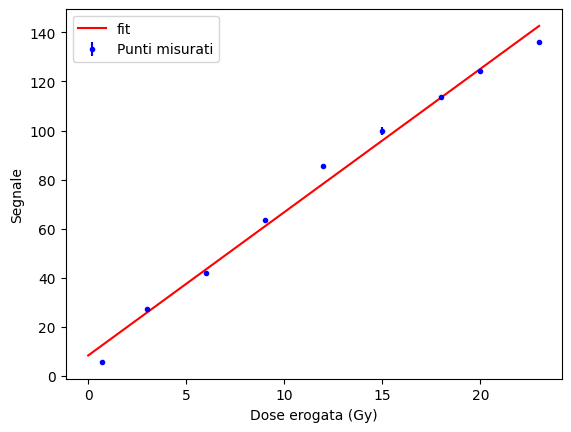

In [33]:
x_cont=np.linspace(0,23,10000)

pars_D, cov_D=curve_fit(lin, D, SatMean, p0=[0,0], bounds=(-np.inf,np.inf))
p_sigma=np.sqrt(np.diag(cov_D))

plt.plot(x_cont, lin(x_cont,*pars_D),'r', label='fit')
plt.errorbar(D,SatMean, yerr=DevSt, fmt='b.', label='Punti misurati')

plt.xlabel('Dose erogata (Gy)')
plt.ylabel('Segnale')

plt.legend();

#valori attesi
Y=pars_D[0]*D+pars_D[1]

#scipy.stats.chisquare(SatMean, Y)

#parametri della retta di fit
print('m=', pars_D[0],'+/-',p_sigma[0]) #coeff angolare
print('q=', pars_D[1],'+/-',p_sigma[1]) #intercetta
print('--------')
print(scipy.stats.chisquare(SatMean, Y))

Il p-value superiore 0.5 



Ora provo a fittare con una retta solo i primi 5 punti per vedere come si discostano i rimanenti

m= 6.84471025656832 +/- 0.31071890790485107
q= 2.7276656857637755 +/- 2.285379327838862
--------
Power_divergenceResult(statistic=1.1971727672585062, pvalue=0.8785638835171352)


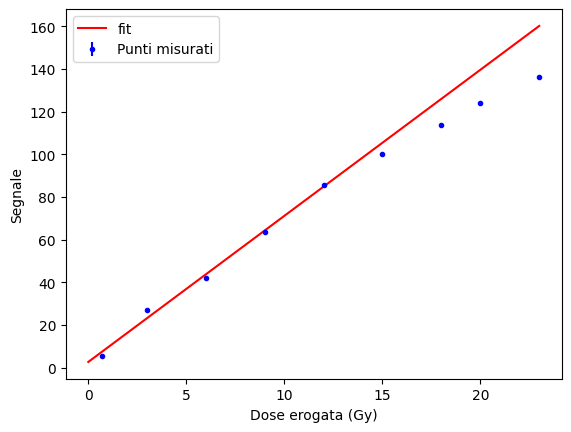

In [34]:
D1=np.array([0.7,3,6,9,12]) 
SatMean1=np.array([M70, M300, M600, M9, M12])


pars_D1, cov_D1=curve_fit(lin, D1, SatMean1, p0=[0,0], bounds=(-np.inf,np.inf))
p_sigma1=np.sqrt(np.diag(cov_D1))

plt.plot(x_cont, lin(x_cont,*pars_D1),'r', label='fit')
plt.errorbar(D,SatMean, yerr=St23, fmt='b.', label='Punti misurati')

plt.xlabel('Dose erogata (Gy)')
plt.ylabel('Segnale')

plt.legend();

#valori attesi
Y1=pars_D1[0]*D1+pars_D1[1]


#parametri della retta di fit
print('m=', pars_D1[0],'+/-',p_sigma1[0]) #coeff angolare
print('q=', pars_D1[1],'+/-',p_sigma1[1]) #intercetta
print('--------')
print(scipy.stats.chisquare(SatMean1, Y1))